In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import Levenshtein

In [20]:
iris=load_iris()

In [21]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [22]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Converting into panda dataframe

In [26]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
flower_name           object
dtype: object

In [27]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df['target']=iris.target

In [31]:
df['target'].unique()

array([0, 1, 2])

In [32]:
df[df['target']==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [33]:
df[df['target']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [34]:
df['flower_name']=df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [35]:
df[df['target']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [36]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


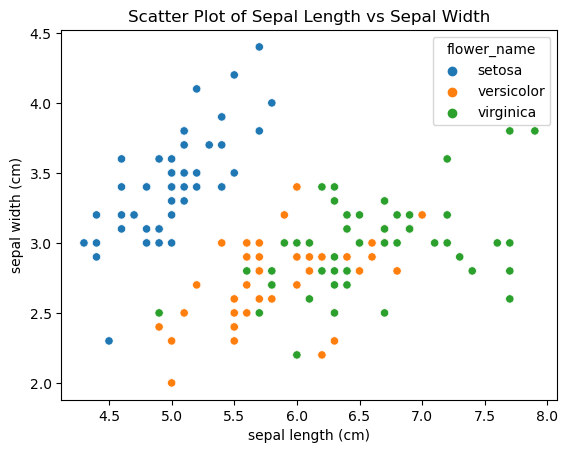

In [43]:
sns.scatterplot(data=df,x='sepal length (cm)',y='sepal width (cm)',hue='flower_name')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

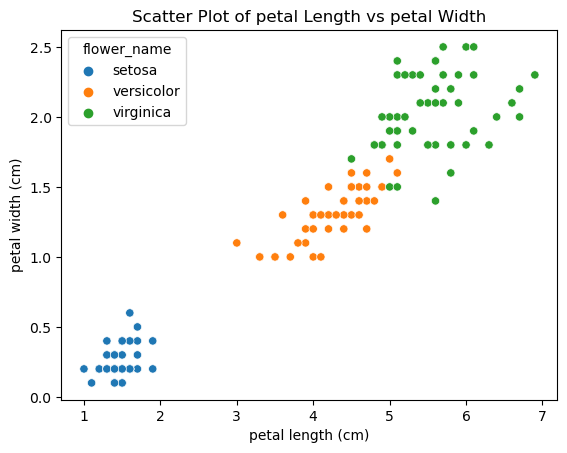

In [44]:
sns.scatterplot(data=df,x='petal length (cm)',y='petal width (cm)',hue='flower_name')
plt.title('Scatter Plot of petal Length vs petal Width')
plt.show()

## Building KNN from scratch

In [68]:
from collections import Counter



In [105]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Convert input to DataFrame if it's not already
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        # Convert DataFrame to float64
        X = X.astype(float)
        y_pred = [self._predict(x) for x in X.values]  # Convert DataFrame to numpy array
        return np.array(y_pred)

    def _predict(self, x):
        # Step 1: Calculate distances between input data point `x` and all training data points
        distances = []
        for x_train in self.X_train:
            distance = np.sqrt(np.sum((x - x_train) ** 2))
            distances.append(distance)
    
        # Step 2: Find indices of the k nearest neighbors
        sorted_indices = np.argsort(distances)
        k_indices = sorted_indices[:self.k]
    
        # Step 3: Retrieve labels of the k nearest neighbors
        k_nearest_labels = []
        for i in k_indices:
            label = self.y_train[i]
            k_nearest_labels.append(label)
    
        # Step 4: Determine the most common label among the k nearest neighbors
        label_counts = np.bincount(k_nearest_labels)
        most_common_label = np.argmax(label_counts)
    
        # Step 5: Return the most common label as the prediction
        return most_common_label


In [62]:
X= df.drop(['target','flower_name'],axis=1)
y=df['target']

In [88]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [87]:
# for column in X.columns:
#     if X[column].str.isdigit().all():
#         X[column] = X[column].astype(int)
#     else:
#         print(f"Column '{column}' contains non-integer values.")


AttributeError: Can only use .str accessor with string values!

In [89]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [64]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train))
print(len(X_test))

120
30


In [93]:
X_train.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [100]:
X_train['petal length (cm)'].unique()

array([4.6, 6.1, 3.9, 5.6, 5.1, 1.5, 4. , 1.4, 5.8, 5.5, 5. , 6.9, 1.7,
       1.3, 6.7, 5.4, 6.3, 4.8, 4.5, 4.2, 1.6, 4.9, 4.4, 5.7, 4.3, 3.3,
       6. , 5.3, 4.1, 6.6, 5.2, 3.6, 3.8, 1.9, 5.9, 1.1, 3.7, 3.5, 1. ,
       4.7])

In [94]:
y_train.dtypes

dtype('int64')

In [106]:
knn = KNN(k=5)
knn.fit(X_train, y_train)

In [107]:
X_test.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [108]:
predictions=knn.predict(X_test)


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U17')) -> None

In [109]:
knn.predict([[7.9,3.8,6.4,2.0]])

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U17')) -> None

In [73]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [74]:
y_test

14     0
98     1
75     1
16     0
131    2
56     1
141    2
44     0
29     0
120    2
94     1
5      0
102    2
51     1
78     1
42     0
92     1
66     1
31     0
35     0
90     1
84     1
77     1
40     0
125    2
99     1
33     0
19     0
73     1
146    2
Name: target, dtype: int64